In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
runtime = [
    [11.8, 47.7, 12.0, 26.6546, 37.1323, 240.087, 54.5919, 54.5821, 51.2936, 170.0, 264.0, 229.2], # our
    [221.0, 6989.0, 186.5, 697.28, 13376.95, 8068.95, 37665.95,  float("inf"), 22867.35, 2841.2, 18967.5, 10472.2], # BT GPU
    [10671.7, float("inf"), 18697.4, float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), float("inf")], # BT CPU
    [2.54E+03, 3.29E+04, 3.70E+03, 1.93E+03, 1.29E+04, 8.80E+03, 9.83E+02, 6.31E+04, 4.70E+03, 9.07E+03, 5.49E+04, 6.24E+04 ], # PRESTO-A
    [9.32E+03, 1.97E+05, 8.85E+03, 9.75E+03, 2.27E+04, 1.09E+04, 3.56E+04, 4.54E+04, 6.25E+03, 1.73E+03, 2.57E+03, 1.84E+03], # PRESTO-E
]
runtime = np.array(runtime)

/tmp/ipykernel_2690229/2186485109.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2e4)


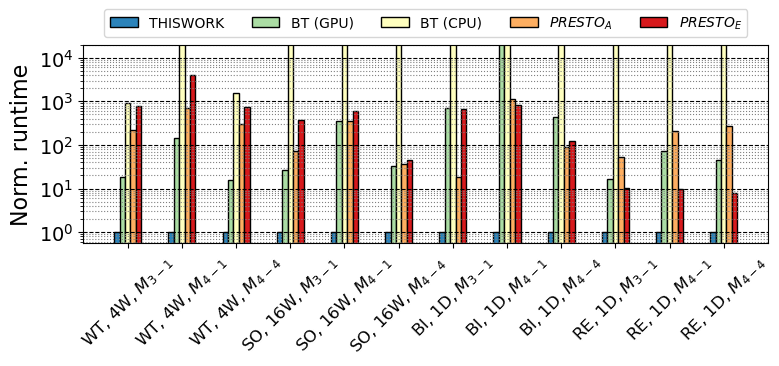

In [3]:
plt.figure(figsize=(8,4))

width=0.1
x = np.arange(runtime.shape[1]) # 10
offset = [-0.2, -0.1, 0, 0.1, 0.2]
colors = ["#d7191c"
,"#fdae61"
,"#ffffbf"
,"#abdda4"
,"#2b83ba"][::-1]
algo = ["THISWORK", "BT (GPU)", "BT (CPU)", r"$PRESTO_A$", r"$PRESTO_E$"]
xticks = [
    r"WT, 4W, $M_{3-1}$", r"WT, 4W, $M_{4-1}$", r"WT, 4W, $M_{4-4}$", 
    r"SO, 16W, $M_{3-1}$", r"SO, 16W, $M_{4-1}$", r"SO, 16W, $M_{4-4}$",
    r"BI, 1D, $M_{3-1}$", r"BI, 1D, $M_{4-1}$", r"BI, 1D, $M_{4-4}$",
    r"RE, 1D, $M_{3-1}$", r"RE, 1D, $M_{4-1}$", r"RE, 1D, $M_{4-4}$",
    ]
normalized_runtime = runtime / runtime[0]
for i in range(runtime.shape[0]): # 5
    plt.bar(x+offset[i], [r if r != float("inf") else 1e5 for r in normalized_runtime[i]], width=width, label=algo[i], edgecolor = "black", color=colors[i])

plt.xticks(x, xticks, rotation=45, fontsize=12)
plt.ylabel("Norm. runtime", fontsize=16)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.ylim(0, 2e4)
# plt.legend()
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0., 1.108, 1., .105))
plt.grid(axis='y', which='minor', ls=':', color='grey')
plt.grid(axis='y', which='major', ls='--', color='black')

# plt.title("Noramlized runtime over TEACUPS.")

plt.tight_layout()
plt.savefig("figs/runtime_overview.pdf")


In [4]:
error = [
    [1.17, 0.49, 5.54, 4.77, 13.47, 0.97, 0.31, 0, 7.84, 7.78, 22.67, 2.41], # our
    [18.87, 14.28, 30.30, 9.75, 4.97, 38.71, 91.52, 0, 32.99, 95.30, 25.13, 38.26], # PRESTO-A
    [36.18, 90.48, 35.41, 35.41, 102.95, 35.96, 41.19, 0, 64.52, 85.45, 94.83, 96.38], # PRESTO-E
]

error = np.array(error)

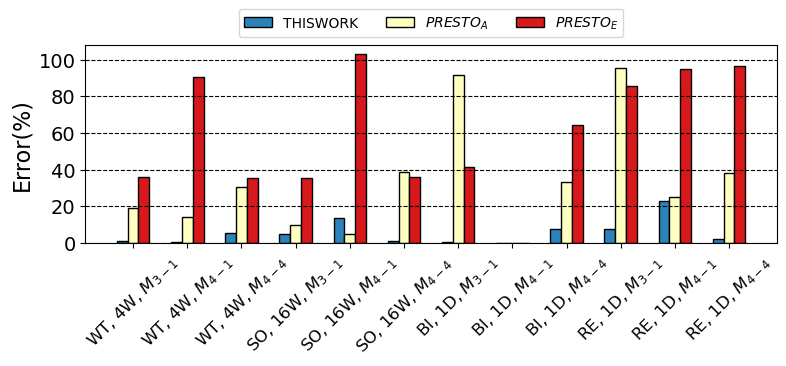

In [5]:
plt.figure(figsize=(8,4))

width=0.2
x = np.arange(error.shape[1]) # 10
offset = [-0.2, 0, 0.2]
colors = ["#d7191c"
,"#fdae61"
,"#ffffbf"
,"#abdda4"
,"#2b83ba"][::-2]
algo = ["THISWORK", r"$PRESTO_A$", r"$PRESTO_E$"]
xticks = [
    r"WT, 4W, $M_{3-1}$", r"WT, 4W, $M_{4-1}$", r"WT, 4W, $M_{4-4}$", 
    r"SO, 16W, $M_{3-1}$", r"SO, 16W, $M_{4-1}$", r"SO, 16W, $M_{4-4}$",
    r"BI, 1D, $M_{3-1}$", r"BI, 1D, $M_{4-1}$", r"BI, 1D, $M_{4-4}$",
    r"RE, 1D, $M_{3-1}$", r"RE, 1D, $M_{4-1}$", r"RE, 1D, $M_{4-4}$",
    ]
for i in range(error.shape[0]): # 5
    plt.bar(x+offset[i], error[i], width=width, label=algo[i], edgecolor = "black", color=colors[i])

plt.xticks(x, xticks, rotation=45, fontsize=12)
plt.ylabel("Error(%)", fontsize=16)
plt.yticks(fontsize=14)
# plt.yscale("log")
# plt.ylim(0, 2e4)
# plt.legend()
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0., 1.108, 1., .105))
plt.grid(axis='y', which='minor', ls=':', color='grey')
plt.grid(axis='y', which='major', ls='--', color='black')

# plt.title("Noramlized runtime over TEACUPS.")

plt.tight_layout()
plt.savefig("figs/error_overview.pdf")